In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

customer = pd.read_json('dim_customer.json')
invoice = pd.read_csv('fct_invoice.csv')

# EASY

1. How many unique customers are in the dataset?

In [31]:
n_unique_customers = invoice['customer_id'].nunique()
print(f'Number of Unique Characters: {unique_customers}')

Number of Unique Characters: 5191


2. What are the different categories of products available? How many unique categories are there?

In [30]:
unique_categories = invoice['category'].unique()
n_unique_categories = invoice['category'].nunique()

print(f'List of Categories: {unique_categories}')
print(f'Number of Unique Categories: {n_unique_categories}')

List of Categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of Unique Categories: 8


3. Which payment method is the most popular? How many times was it used?

In [49]:
most_payment_method = invoice['payment_method'].mode()[0] #returns the highest value/repetitions
n_most_payment_method = invoice['payment_method'].value_counts().max() #value_counts takes each payment mathod and counts it

print(f'Most Popular Payment Method: {most_payment_method}')
print(f'How Many Times Most Popular Payment Method Was Used: {n_most_payment_method}')

Most Popular Payment Method: Cash
How Many Times Most Popular Payment Method Was Used: 44447


# MEDIUM

1. What are the three most popular categories, by total sales?

In [182]:
invoice['total_sales'] = invoice['quantity'] * invoice['price']
most_category = invoice.groupby('category').sum()['total_sales'].nlargest(3)
most_category_names = most_category.index.tolist()

print(f'Three Most Popular Categories by Total Sales: {most_category_names}')

Three Most Popular Categories by Total Sales: ['Clothing', 'Shoes', 'Technology']


2. What are the total sales attributed to customers over the age of 45?

In [171]:
customer_invoice = pd.merge(invoice, customer, left_on='customer_id', right_on='id')
customer_invoice['total_sales'] = customer_invoice['quantity'] * customer_invoice['price']
sales_over_45 = customer_invoice[customer_invoice['age'] > 45]['total_sales'].sum()

print(f'Total Sales Attributed to Customers Over 45: {sales_over_45}')


Total Sales Attributed to Customers Over 45: 82039768.15


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

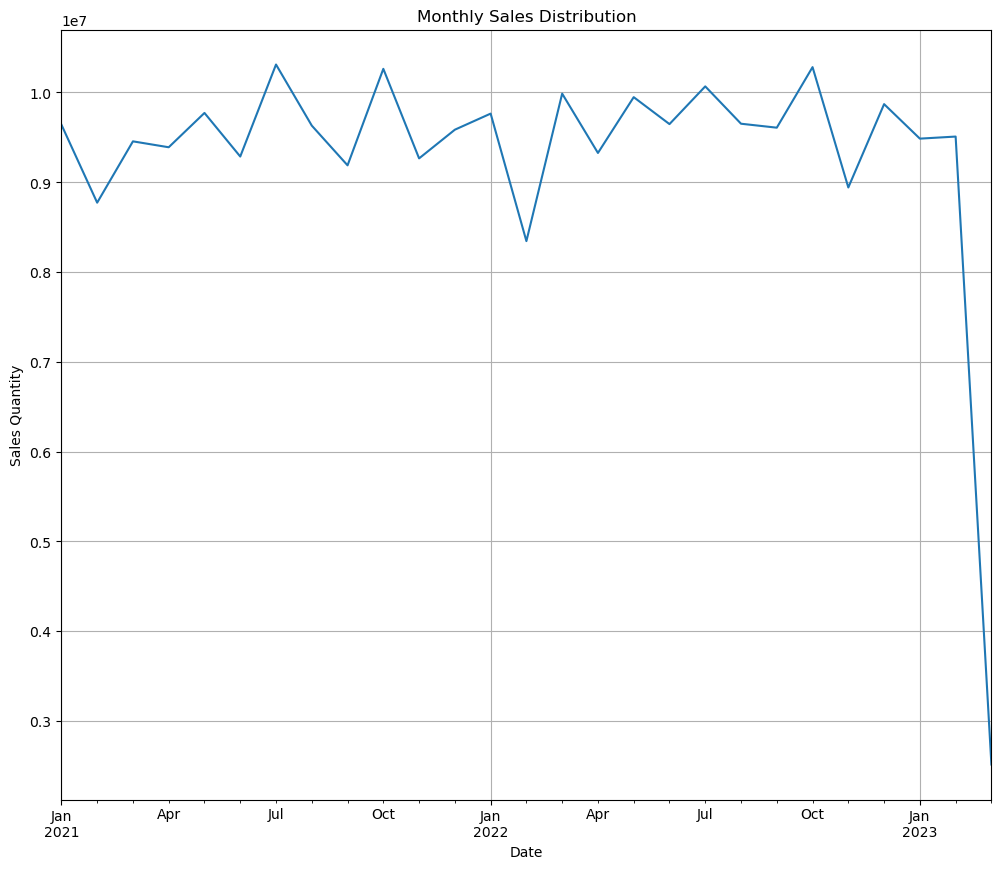

In [202]:
invoice['invoice_date'] = pd.to_datetime(invoice['invoice_date'], dayfirst=True)
monthly_sales = invoice.resample('ME', on='invoice_date')['total_sales'].sum()

plt.figure(figsize=(12, 10))
monthly_sales.plot()
plt.grid()
plt.title('Monthly Sales Distribution')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.show()

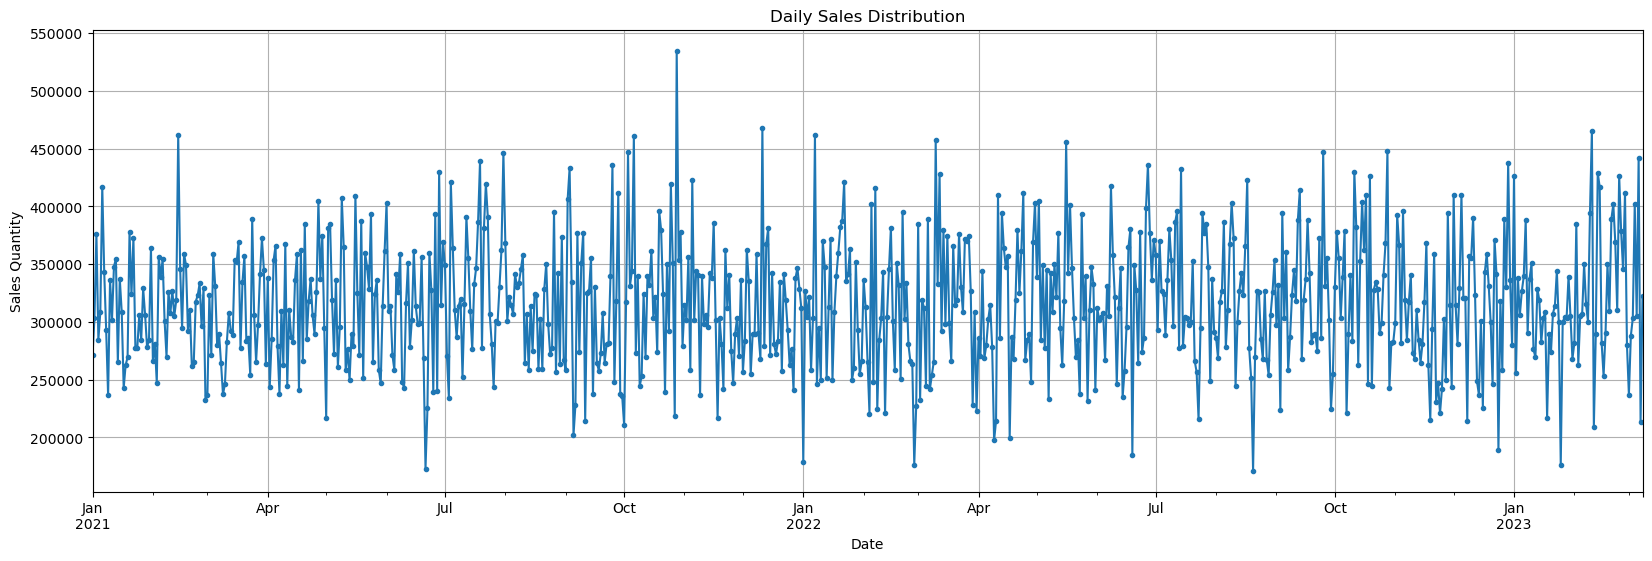

In [199]:
invoice['invoice_date'] = pd.to_datetime(invoice['invoice_date'], dayfirst=True)
daily_sales = invoice.resample('D', on='invoice_date')['total_sales'].sum()

plt.figure(figsize=(20, 6))
daily_sales.plot(marker='o', markersize=3)
plt.grid()
plt.title('Daily Sales Distribution')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.show()

The first chart reflects the seasonal trend for sales by graphing a monthly sales distribution. It can be observed that sales are usually highest during July and October, while they are lowest during February. To provide a probable explanation of these trends, the July peak might be influenced by summer sales or back-to-school shopping, while October's high sales could be associated with the holiday season. Similarly, the February low might be due to post-holiday spending slumps.

On the other hand, the second chart shows the daily sales distribution which gives a better view of the day-to-day variation in sales. The continuous fluctuation in these trends may be driven by various factors including the day of the week or promotions. 

# HARD

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [196]:
customer_invoice['decades'] = (customer_invoice['age']//10)*10

pivot_table = pd.pivot_table(customer_invoice, 
                             index='category', 
                             columns='decades', 
                             values='total_sales', 
                             aggfunc='sum', 
                             fill_value=0)

pivot_table.columns = pivot_table.columns.astype(int)
age_groups = {decade: f"{decade}-{decade+9}" for decade in pivot_table.columns}
pivot_table.rename(columns=age_groups, inplace=True)

print(pivot_table)


decades               10-19        20-29        30-39        40-49  \
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

decades                50-59        60-69       70-79       80-89  
category                                                           
Books               74962.20     80476.80    54827.85    26664.00  
Clothing         10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics          587780.9